<a href="https://colab.research.google.com/github/NINJAHATTORI004/csi/blob/main/TASK4_CSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (887, 8)
First 5 rows:
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


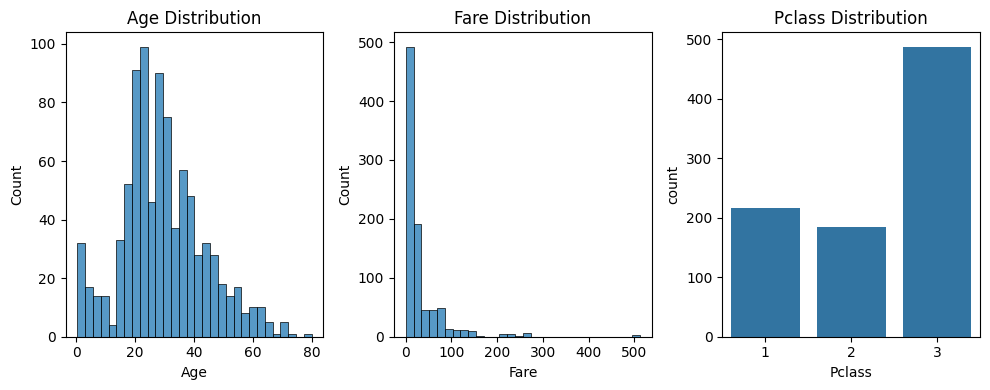

Missing values per column:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
Number of outliers detected:
Age      13
Fare    116
dtype: int64


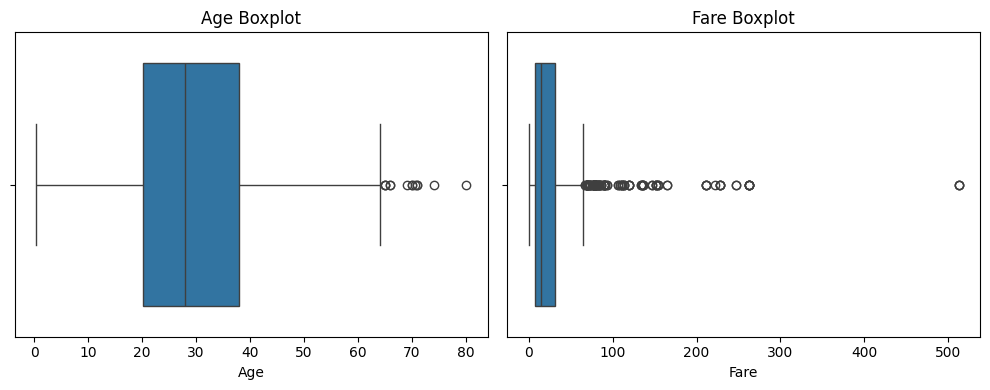

Correlation matrix:
                         Survived    Pclass       Age  \
Survived                 1.000000 -0.336528 -0.059665   
Pclass                  -0.336528  1.000000 -0.391492   
Age                     -0.059665 -0.391492  1.000000   
Siblings/Spouses Aboard -0.037082  0.085026 -0.297669   
Parents/Children Aboard  0.080097  0.020252 -0.193741   
Fare                     0.256179 -0.548919  0.112329   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                               -0.037082                 0.080097   
Pclass                                  0.085026                 0.020252   
Age                                    -0.297669                -0.193741   
Siblings/Spouses Aboard                 1.000000                 0.414244   
Parents/Children Aboard                 0.414244                 1.000000   
Fare                                    0.158839                 0.215470   

                             Fare  
Surv

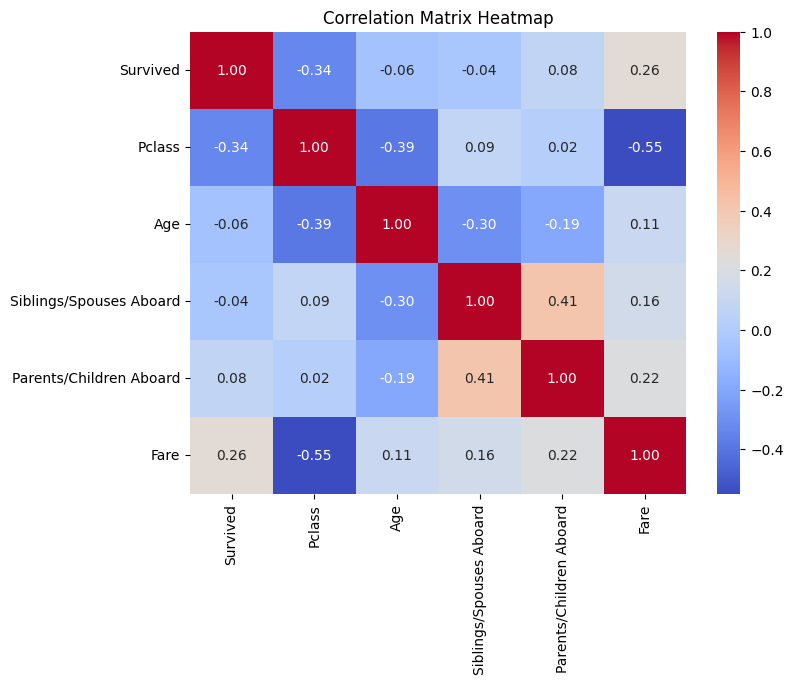

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)

# 1. Data Overview
print('Data shape:', data.shape)
print('First 5 rows:')
print(data.head())

# 2. Data Distributions
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'].dropna(), kde=False, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Fare'], kde=False, bins=30)
plt.title('Fare Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', data=data)
plt.title('Pclass Distribution')
plt.tight_layout()
plt.show()

# 3. Missing Values
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values)

# 4. Outlier Detection using IQR for Age and Fare only
Q1 = data[['Age', 'Fare']].quantile(0.25)
Q3 = data[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (data[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).sum()
print('Number of outliers detected:')
print(outliers)

# Box plots for Age and Fare
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Age'])
plt.title('Age Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Fare'])
plt.title('Fare Boxplot')
plt.tight_layout()
plt.show()

# 5. Relationships Between Variables
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
print('Correlation matrix:')
print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
